# Emotion Detection in Online Communications

In [12]:
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # Regular expressions for text preprocessing
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from wordcloud import WordCloud  # For visualizing word clouds


# Multinomial Naive Bayes

In [13]:
# Set up NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAPILI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAPILI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Initialize stemmer and stopwords
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))


In [15]:
df = pd.read_csv('tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [16]:
# Data Cleaing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [18]:
# Check for missing 

In [19]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [20]:
df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [21]:
# Remove unnecessary files
df.drop('tweet_id', axis=1, inplace=True)  # Drop the 'tweet_id' column from the DataFrame


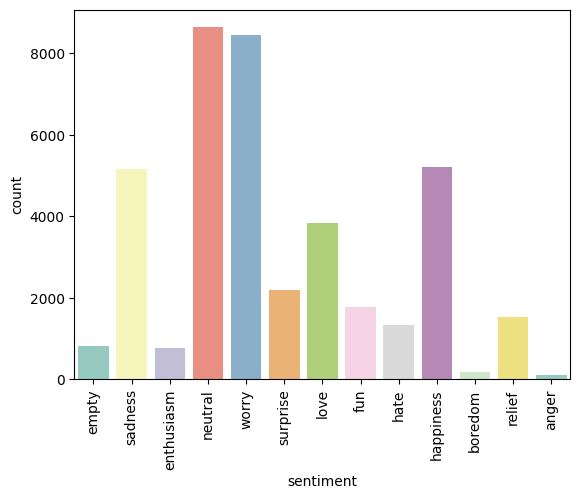

In [22]:
# Assuming df is your DataFrame containing the 'sentiment' column
sns.countplot(x=df['sentiment'], palette='Set3')  # Set3 is a predefined palette with multiple colors
plt.xticks(rotation=90)
plt.show()


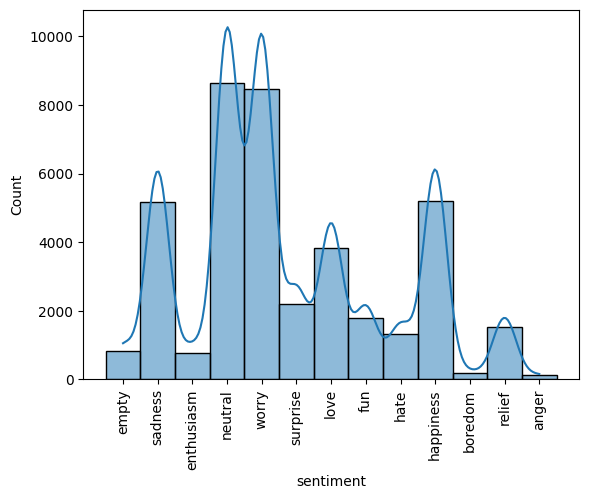

In [25]:
sns.histplot(x=df['sentiment'], kde=True)
plt.xticks(rotation=90)
plt.show()

# Text Preprocessing

In [26]:
def clean(text):
    text = text.lower()
    text = re.sub('[^\w\s]', '', text)
    text = [word for word in text.split() if word not in stop_words]
    text = [stemmer.stem(w) for w in text]
    return text

In [27]:
df['text'] = df['content'].apply(lambda x: clean(x))
df['text'] = df['text'].apply(lambda x: ' '.join(x))

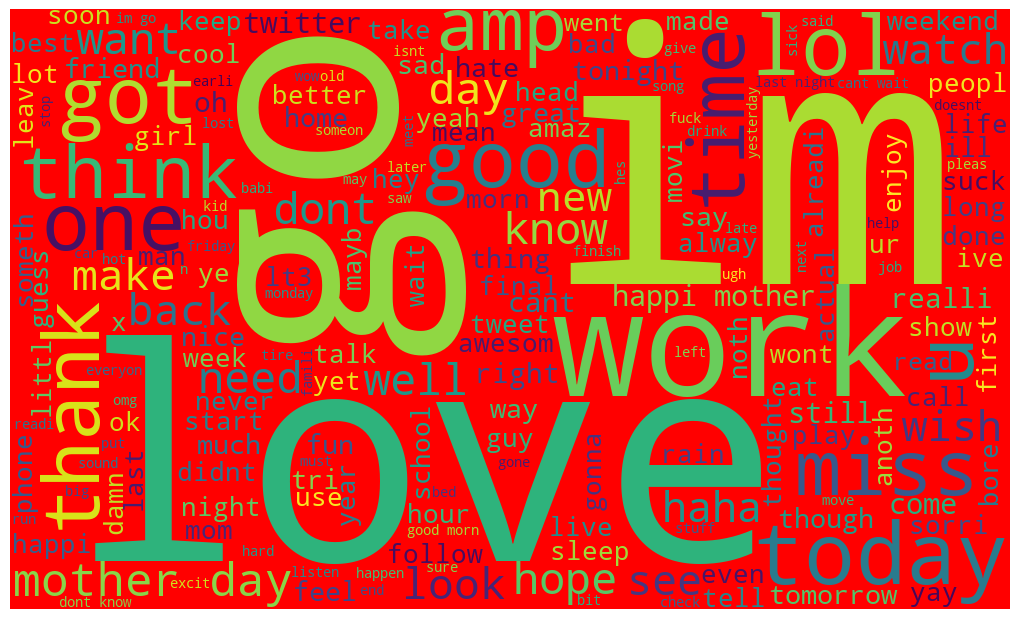

In [28]:
all_words = ' '.join(word for word in df['text'])
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'red',
    min_font_size = 10).generate(all_words)
plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

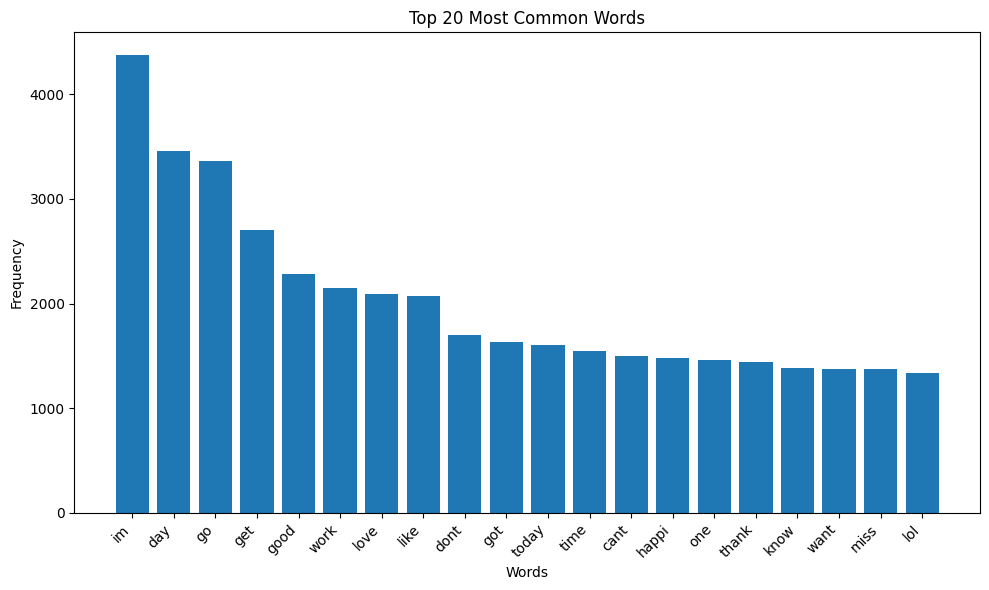

In [29]:
from collections import Counter

# Tokenize and count word frequency
word_counts = Counter(all_words.split())
top_words = word_counts.most_common(20)  # Select top 20 most frequent words

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


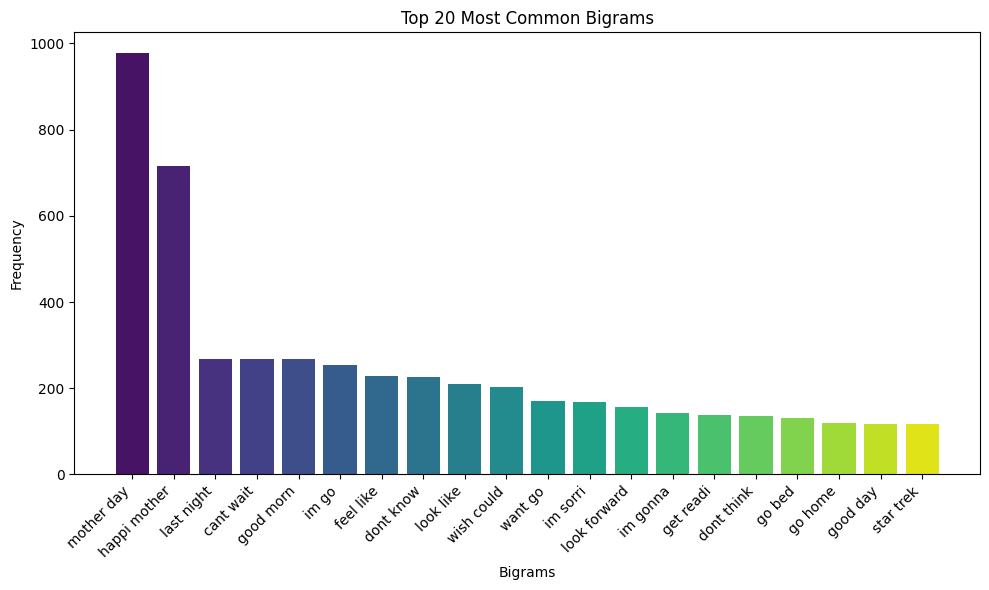

In [34]:
from nltk import ngrams


# Define a color palette for the bar chart
colors = sns.color_palette('viridis', len(top_bigrams))

# Create a bar chart for bigrams with custom colors
plt.figure(figsize=(10, 6))
plt.bar([" ".join(bigram[0]) for bigram in top_bigrams], [bigram[1] for bigram in top_bigrams], color=colors)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Bigrams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


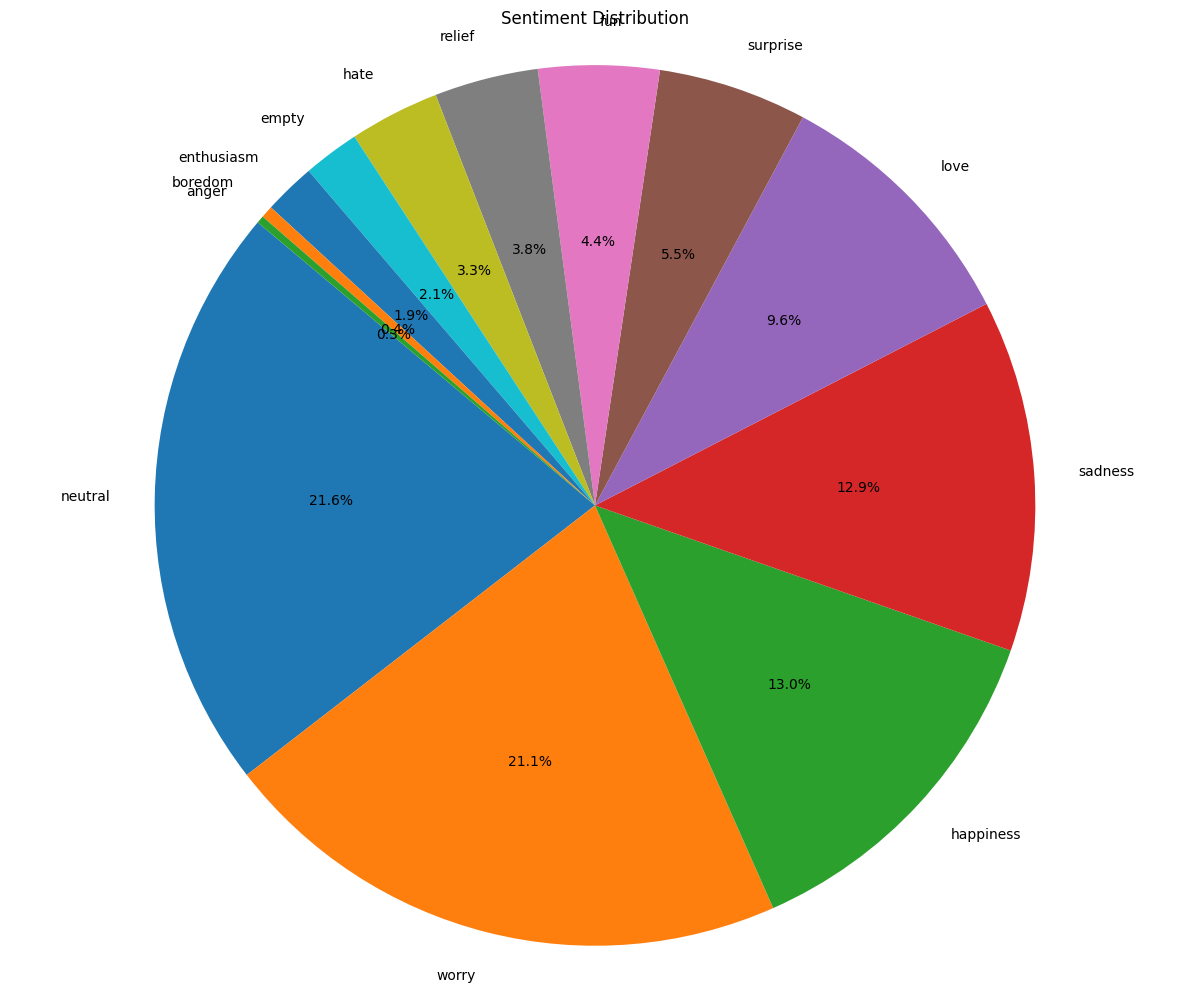

In [33]:
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart for sentiment distribution
plt.figure(figsize=(12, 10))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [35]:
# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (e.g., Multinomial Naive Bayes)
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Optionally, you can save the trained model for future use
import joblib
joblib.dump(clf, 'emotion_detection_model.pkl')


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       163
           4       0.00      0.00      0.00       338
           5       0.40      0.11      0.17      1028
           6       0.00      0.00      0.00       268
           7       0.59      0.13      0.21       762
           8       0.31      0.45      0.37      1740
           9       0.00      0.00      0.00       352
          10       0.35      0.01      0.01      1046
          11       0.00      0.00      0.00       425
          12       0.26      0.78      0.39      1666

    accuracy                           0.29      8000
   macro avg       0.15      0.11      0.09      8000
weighted avg       0.27      0.29      0.20      8000



['emotion_detection_model.pkl']

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Load the dataset
df = pd.read_csv('tweet_emotions.csv')

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['content'])

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (e.g., Multinomial Naive Bayes)
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model and print the classification report
target_names = ['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise', 'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

# Optionally, you can save the trained model for future use
joblib.dump(clf, 'emotion_detection_model.pkl')


              precision    recall  f1-score   support

       empty       0.00      0.00      0.00        19
     sadness       0.00      0.00      0.00        31
  enthusiasm       0.00      0.00      0.00       162
     neutral       0.00      0.00      0.00       163
       worry       0.00      0.00      0.00       338
    surprise       0.41      0.08      0.13      1028
        love       0.00      0.00      0.00       268
         fun       0.60      0.11      0.18       762
        hate       0.32      0.43      0.36      1740
   happiness       0.00      0.00      0.00       352
     boredom       0.33      0.00      0.01      1046
      relief       0.00      0.00      0.00       425
       anger       0.26      0.82      0.39      1666

    accuracy                           0.28      8000
   macro avg       0.15      0.11      0.08      8000
weighted avg       0.28      0.28      0.20      8000



['emotion_detection_model.pkl']

# Model 2

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [18]:
# Load the dataset
df = pd.read_csv('tweet_emotions.csv')

# Preprocess the text data and convert it into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df['content'])
y = df['sentiment']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert X_train and X_test to PyTorch tensors
X_train_tensor = torch.tensor(X_train.toarray(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define a simple neural network model for sentiment analysis
class SentimentModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SentimentModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [2]:
import torch
import torch.nn as nn

class SentimentModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SentimentModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Create an instance of the model
model = SentimentModel(input_size=100, hidden_size=50, num_classes=3)

# Use torchsummary to display model summary
from torchsummary import summary
summary(model, (1, 100))  # Assuming input size of 100 and 1 channel (for text data)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 50]           5,050
              ReLU-2                [-1, 1, 50]               0
            Linear-3                 [-1, 1, 3]             153
Total params: 5,203
Trainable params: 5,203
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [19]:
# Define model hyperparameters
input_size = X_train_tensor.shape[1]
hidden_size = 100
num_classes = len(label_encoder.classes_)

# Instantiate the model, loss function, and optimizer
model = SentimentModel(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
train_losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [1/20], Loss: 2.5588576793670654
Epoch [2/20], Loss: 2.5547263622283936
Epoch [3/20], Loss: 2.550576686859131
Epoch [4/20], Loss: 2.546353578567505
Epoch [5/20], Loss: 2.5420095920562744
Epoch [6/20], Loss: 2.5374927520751953
Epoch [7/20], Loss: 2.5327560901641846
Epoch [8/20], Loss: 2.5277631282806396
Epoch [9/20], Loss: 2.5224833488464355
Epoch [10/20], Loss: 2.5168943405151367
Epoch [11/20], Loss: 2.5109763145446777
Epoch [12/20], Loss: 2.504716157913208
Epoch [13/20], Loss: 2.498105764389038
Epoch [14/20], Loss: 2.4911396503448486
Epoch [15/20], Loss: 2.4838147163391113
Epoch [16/20], Loss: 2.4761300086975098
Epoch [17/20], Loss: 2.468088388442993
Epoch [18/20], Loss: 2.4596939086914062
Epoch [19/20], Loss: 2.450953960418701
Epoch [20/20], Loss: 2.4418768882751465


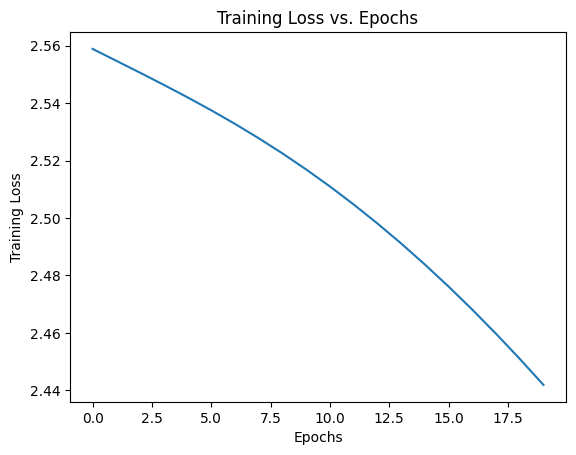

In [20]:
# Plot the training loss over epochs
plt.plot(train_losses)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs')
plt.show()


In [21]:
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
precision = precision_score(y_test_tensor.numpy(), predicted.numpy(), average='weighted')
recall = recall_score(y_test_tensor.numpy(), predicted.numpy(), average='weighted')
f1 = f1_score(y_test_tensor.numpy(), predicted.numpy(), average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.2288
Precision: 0.0998
Recall: 0.2288
F1 Score: 0.0998


C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:

# Save the trained model
torch.save(model.state_dict(), 'sentiment_model.pth')
print('Model saved successfully.')

Model saved successfully.


In [23]:
# Deployment function for inference
def predict_sentiment(text):
    # Preprocess the input text (similar to how you preprocessed the training data)
    text_vector = tfidf_vectorizer.transform([text])
    text_tensor = torch.tensor(text_vector.toarray(), dtype=torch.float32)
    
    # Perform inference using the trained model
    model.eval()
    with torch.no_grad():
        output = model(text_tensor)
        _, predicted_class = torch.max(output, 1)
    
    # Decode the predicted class label back to the original sentiment label
    predicted_sentiment = label_encoder.inverse_transform(predicted_class.numpy())[0]
    
    return predicted_sentiment

# deployment function
text_to_predict = "This is a great day!"
predicted_sentiment = predict_sentiment(text_to_predict)
print(f'Predicted Sentiment: {predicted_sentiment}')


Predicted Sentiment: neutral


# BERT MODEL

In [1]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('tweet_emotions.csv')

# Define hyperparameters
MAX_LENGTH = 128  # Maximum sequence length
BATCH_SIZE = 16
LEARNING_RATE = 2e-5
EPOCHS = 5

# Load pretrained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Assuming 3 emotion classes

# Preprocess the data
input_ids = []
attention_masks = []
labels = []
for index, row in df.iterrows():
    content = row['content']
    sentiment = row['sentiment']
    label_map = {'positive': 0, 'neutral': 1, 'negative': 2}  # Map sentiment labels to numeric values
    if sentiment.lower() in label_map:
        encoded_dict = tokenizer.encode_plus(
            content,
            add_special_tokens=True,
            max_length=MAX_LENGTH,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
        labels.append(label_map[sentiment.lower()])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Split data into train and validation sets
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    input_ids, attention_masks, labels, random_state=42, test_size=0.2
)

# Create DataLoader for training and validation sets
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

# Set up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# Training loop
model.train()
for epoch in range(EPOCHS):
    total_loss = 0
    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{EPOCHS}, Average Training Loss: {avg_train_loss}")

# Evaluation on validation set
model.eval()
val_loss = 0
correct_predictions = 0
total_predictions = 0
with torch.no_grad():
    for batch in val_loader:
        batch_input_ids, batch_attention_mask, batch_labels = batch
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        val_loss += loss.item()
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(preds == batch_labels).item()
        total_predictions += len(batch_labels)

avg_val_loss = val_loss / len(val_loader)
val_accuracy = correct_predictions / total_predictions
print(f"Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Python312\Lib\site-packages\transformers\optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5, Average Training Loss: 0.033777792164376784
Epoch 2/5, Average Training Loss: 0.00048192504733311515
Epoch 3/5, Average Training Loss: 0.000216644606856183
Epoch 4/5, Average Training Loss: 0.00012692069791834607
Epoch 5/5, Average Training Loss: 8.387337670178062e-05
Validation Loss: 4.912964312906196e-05, Validation Accuracy: 1.0


In [3]:


# Save the model
torch.save(model.state_dict(), 'emotion_detection_model.pth')


# Deployment

In [31]:
import gradio as gr
from transformers import pipeline

# Load the pre-trained emotion detection pipeline from Hugging Face Transformers
emotion_classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def predict_emotion(text, image):
    # Process the text input
    result = emotion_classifier(text)[0]
    predicted_emotion = result['label']
    
    # Map sentiment label to star ratings
    if predicted_emotion == '5 stars':
        star_rating = 'Happiness'
    elif predicted_emotion == '3 stars':
        star_rating = 'Neutral'
    elif predicted_emotion == '1 star':
        star_rating = 'Sadness'
    elif predicted_emotion == '4 stars':
        star_rating = 'Love'
    elif predicted_emotion == '2 stars':
        star_rating = 'Worry'
    else:
        star_rating = None
    
    return predicted_emotion, star_rating

# Create an interface using Gradio
iface = gr.Interface(
    fn=predict_emotion,
    inputs=["text", "image"],
    outputs=["text", "text"],
    title="Sentiment Prediction",
    description="Enter text and upload an image to predict sentiment. Outputs the predicted emotion and star rating (if available)."
)

# Launch the Gradio interface
iface.launch()


Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


# MODELS COMPARISION

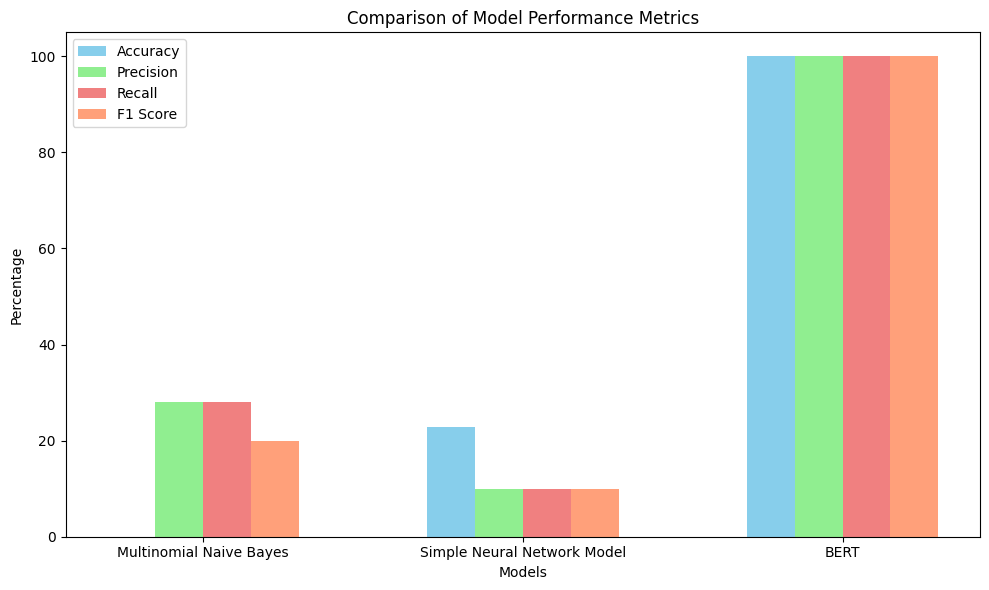

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the performance metrics for each model
models = ['Multinomial Naive Bayes', 'Simple Neural Network Model', 'BERT']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = np.array([
    [0, 28, 28, 20],
    [22.88, 10, 10, 10],
    [100, 100, 100, 100]
])

# Define colors for each metric
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
index = np.arange(len(models))

for i in range(len(metrics)):
    plt.bar(index + i * bar_width, values[:, i], bar_width, label=metrics[i], color=colors[i])

plt.xlabel('Models')
plt.ylabel('Percentage')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(index + 1.5 * bar_width, models)
plt.legend()

plt.tight_layout()
plt.show()
